In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
print(len(mnist_data))

60000


5


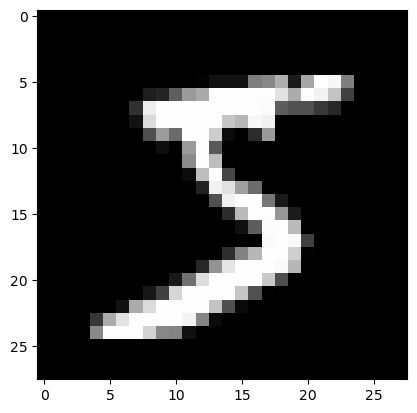

In [3]:
plt.imshow(mnist_data[0][0][0], cmap='gray')
print(mnist_data[0][1])

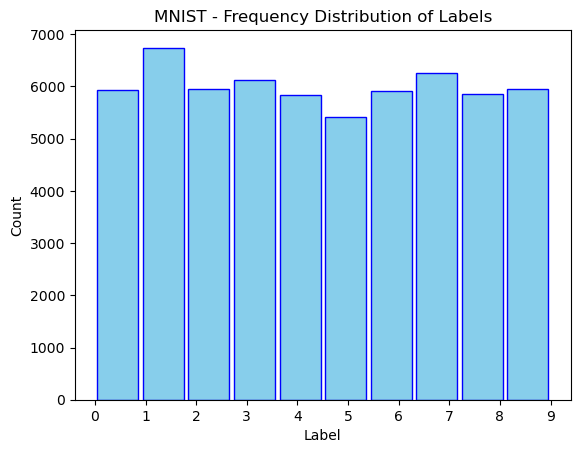

In [4]:
labels = [mnist_data[i][1] for i in range(len(mnist_data))]
plt.hist(labels, bins=10, rwidth=0.9, color='skyblue', edgecolor='blue', align='mid')
plt.title('MNIST - Frequency Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(10))
plt.show()

In [5]:
import einops

In [6]:
mnist_data.data.float().shape

torch.Size([60000, 28, 28])

In [7]:
batch_size = 25
nbatch = len(mnist_data) // batch_size
mnist_data = einops.rearrange(mnist_data.data.float(), '(n b) h w -> n b () h w', n=nbatch, b=batch_size)
print(mnist_data.shape)

torch.Size([2400, 25, 1, 28, 28])


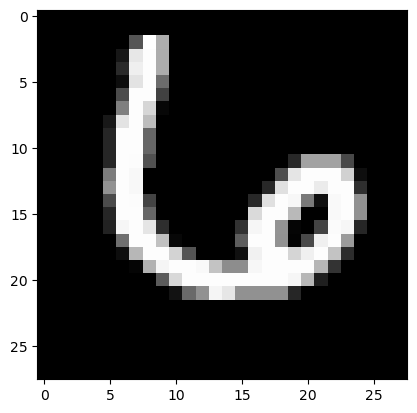

In [8]:
import random
random_batch = random.choice(mnist_data)
random_image = random.choice(random_batch)
plt.imshow(random_image[0], cmap='gray')

/home/exouser/.conda/envs/me592/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1704987301168/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


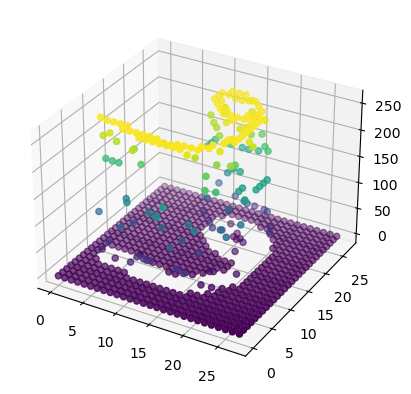

In [9]:
# 3d plot of the image intensity
mesh_x, mesh_y = torch.meshgrid(torch.arange(0, 28), torch.arange(0, 28))
x_flat = mesh_x.flatten()
y_flat = mesh_y.flatten()
img_intensity = random_image.flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_flat, y_flat, img_intensity, c=img_intensity)
plt.show()


In [10]:
import pandas as pd
energydata = pd.read_csv('./data/energydata_complete.csv')
print(energydata.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [11]:
print(energydata.columns)

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


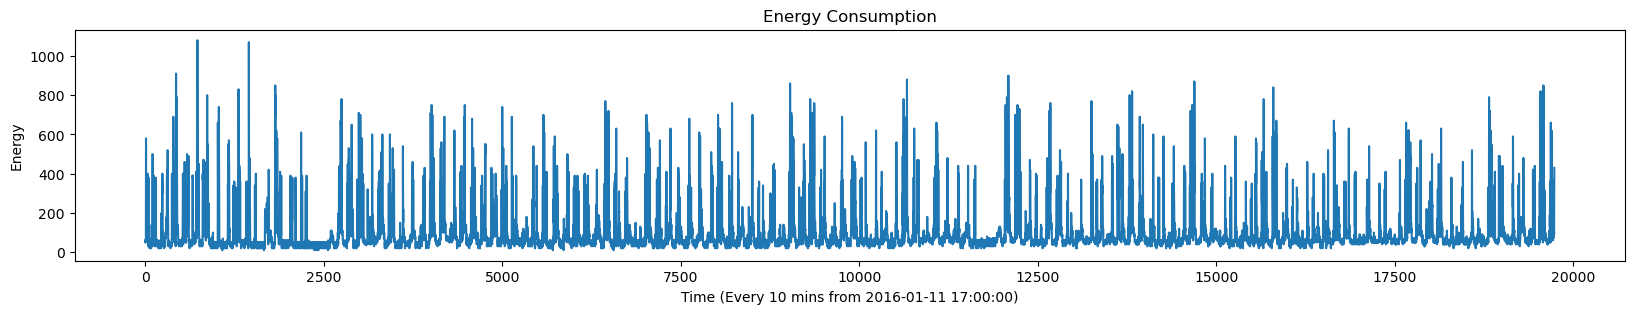

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(energydata['Appliances'])
plt.title('Energy Consumption')
plt.xlabel('Time (Every 10 mins from 2016-01-11 17:00:00)')
plt.ylabel('Energy')
plt.show()

Text(0, 0.5, 'Energy')

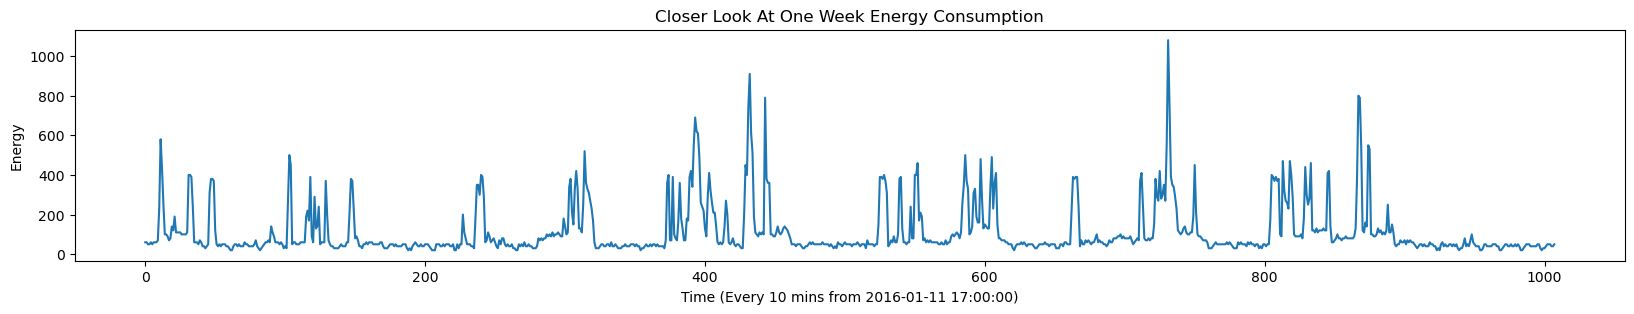

In [13]:
# closer look at the energy consumption of one week
plt.figure(figsize=(20, 3))
plt.plot(energydata['Appliances'][:7*24*6])
plt.title('Closer Look At One Week Energy Consumption')
plt.xlabel('Time (Every 10 mins from 2016-01-11 17:00:00)')
plt.ylabel('Energy')

In [14]:
energydata['date'][42]

'2016-01-12 00:00:00'

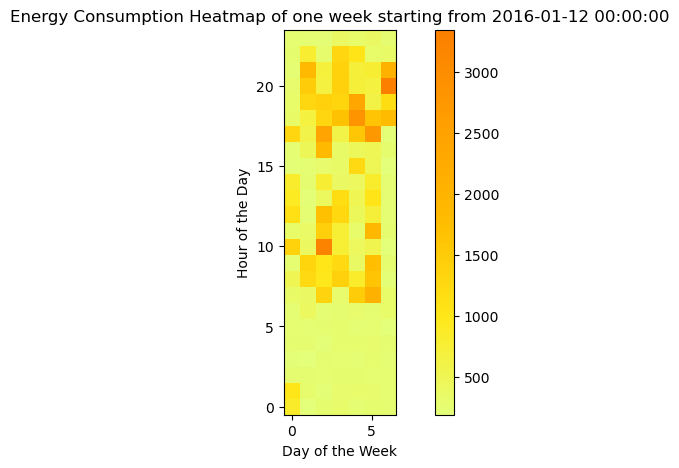

In [15]:
energy_week = energydata['Appliances'][42:42+7*24*6]
energy_hour = [energy_week[i:i+6].sum() for i in range(0, len(energy_week), 6)]
energyhour = np.array(energy_hour).reshape(7, 24)
energyhour = energyhour.T
plt.figure(figsize=(10, 5))
plt.imshow(energyhour, cmap='Wistia', interpolation='nearest')
plt.title('Energy Consumption Heatmap of one week starting from 2016-01-12 00:00:00')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

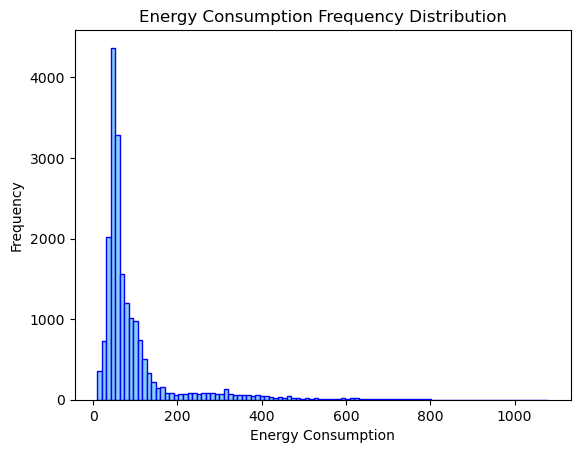

In [16]:
plt.hist(energydata['Appliances'], bins=100, rwidth=2, color='skyblue', edgecolor='blue', align='mid')
plt.title('Energy Consumption Frequency Distribution')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

In [17]:
energydata['date'][0]

'2016-01-11 17:00:00'

In [18]:
energydata.shape

(19735, 29)

In [19]:
np.tile([(i)*600 for i in range(24*6)], 7)

array([    0,   600,  1200, ..., 84600, 85200, 85800])

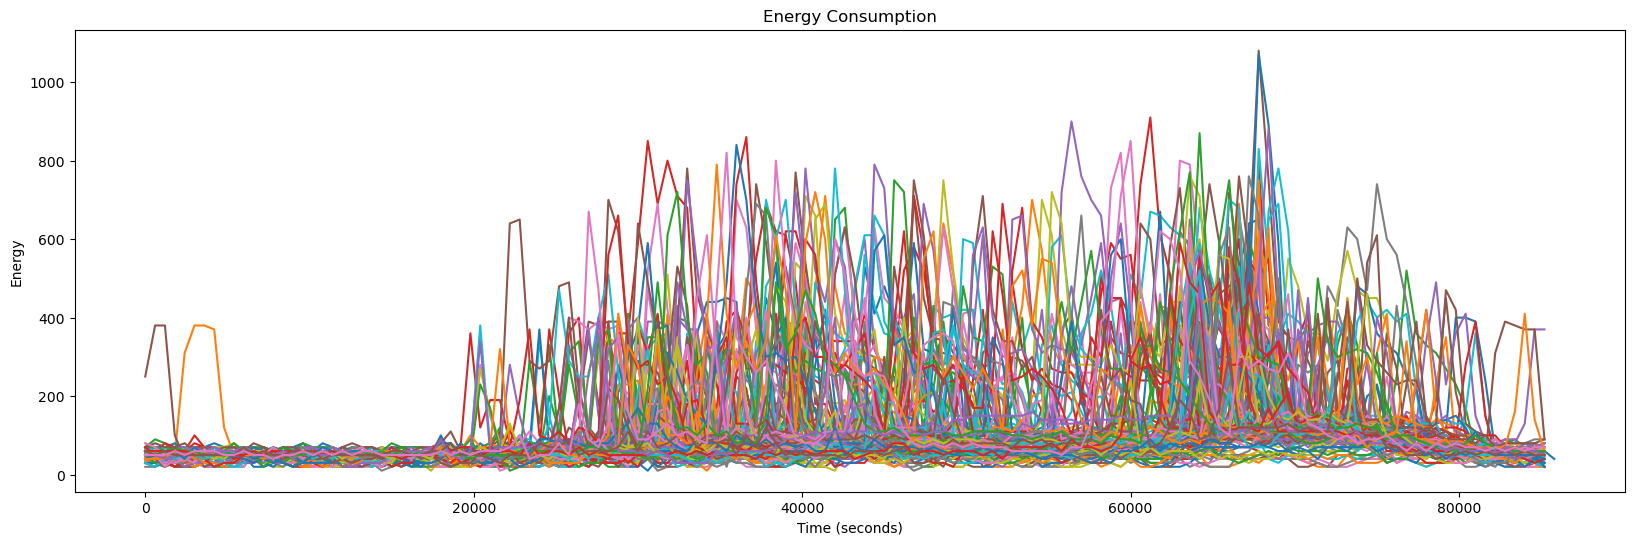

In [20]:
plt.figure(figsize=(20, 6))
time_in_seconds = np.array([17*3600 + i*600 for i in range(42)])
time_in_seconds = np.append(time_in_seconds, np.tile([(i)*600 for i in range(24*6)], len(energydata[42:])//(24*6)))
time_in_seconds = np.append(time_in_seconds, np.array([(i)*600 for i in range(len(energydata) - len(time_in_seconds))]))

plt.plot(time_in_seconds[:42], energydata['Appliances'][:42])
for i in range(42, len(energydata)-24*6, 24*6):
    # debug to see if the time_in_seconds and energydata['date'] are aligned
    # print(time_in_seconds[i], time_in_seconds[i+24*6-1])
    # print(energydata['date'][i], energydata['date'][i+24*6-1])
    plt.plot(time_in_seconds[i:i+24*6-1], energydata['Appliances'][i:i+24*6-1])

# feature NSM is the time of the day in seconds
energydata['NSM'] = time_in_seconds

plt.title('Energy Consumption')
plt.xlabel('Time (seconds)')
plt.ylabel('Energy')
plt.show()

Text(0, 0.5, 'Energy')

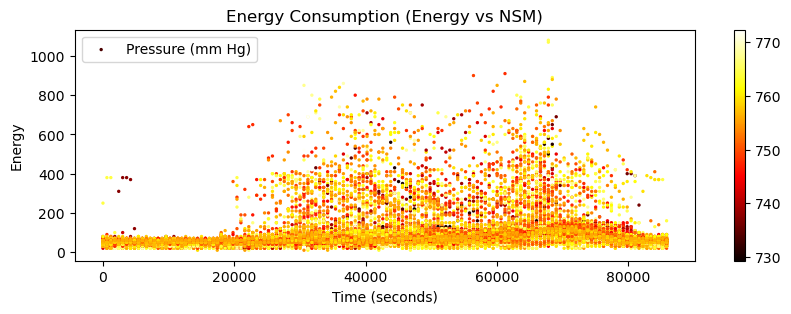

In [21]:
plt.figure(figsize=(10, 3))
plt.scatter(energydata['NSM'], energydata['Appliances'], s=2, c=energydata['Press_mm_hg'], cmap='hot')
plt.colorbar()
plt.legend(['Pressure (mm Hg)'])
plt.title('Energy Consumption (Energy vs NSM)')
plt.xlabel('Time (seconds)')
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

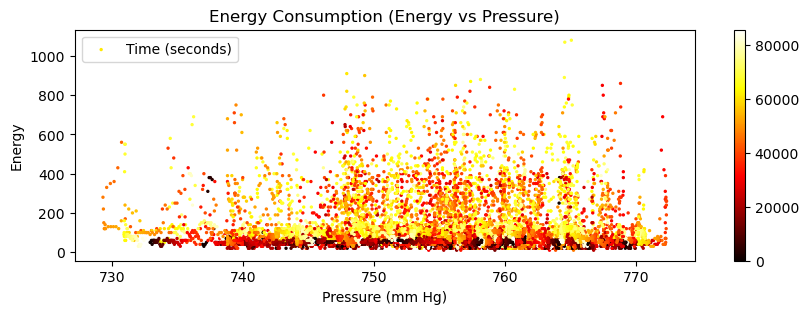

In [22]:
# plot the energy consumption against the press_mm_hg
plt.figure(figsize=(10, 3))
plt.scatter(energydata['Press_mm_hg'], energydata['Appliances'], s=2, c=energydata['NSM'], cmap='hot')
plt.colorbar()
plt.legend(['Time (seconds)'])
plt.title('Energy Consumption (Energy vs Pressure)')
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy')

Text(0.5, 0, 'Time (seconds)')

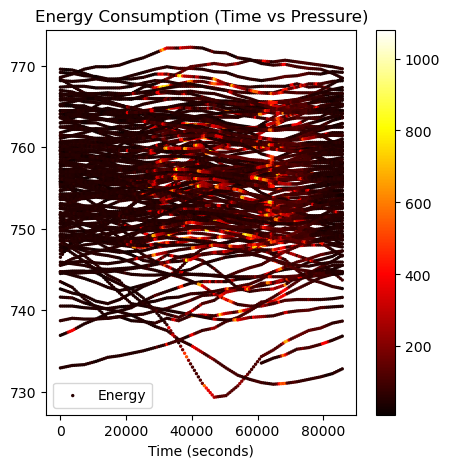

In [23]:
# NSM vs Press_mm_hg
plt.figure(figsize=(5, 5))
plt.scatter(energydata['NSM'], energydata['Press_mm_hg'], s=2, c=energydata['Appliances'], cmap='hot')
plt.colorbar()
plt.legend(['Energy'])
plt.title('Energy Consumption (Time vs Pressure)')
plt.xlabel('Time (seconds)')


In [24]:
data = np.loadtxt('./data/airfoil_self_noise.dat')
print(data.shape)

(1503, 6)


In [25]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
print("Mean and Standard Deviation of Frequency: ", means[0], stds[0])
print("Mean and Standard Deviation of Angle of Attack: ", means[1], stds[1])
print("Mean and Standard Deviation of Chord Length: ", means[2], stds[2])
print("Mean and Standard Deviation of Free-Stream Velocity: ", means[3], stds[3])
print("Mean and Standard Deviation of Suction Side Displacement Thickness: ", means[4], stds[4])
print("Mean and Standard Deviation of Scaled Sound Pressure Level: ", means[5], stds[5])



Mean and Standard Deviation of Frequency:  2886.3805721889553 3151.524202236218
Mean and Standard Deviation of Angle of Attack:  6.782302062541517 5.916159025472469
Mean and Standard Deviation of Chord Length:  0.13654823685961226 0.09350960518948366
Mean and Standard Deviation of Free-Stream Velocity:  50.860745176314175 15.56760296639676
Mean and Standard Deviation of Suction Side Displacement Thickness:  0.011139880391217556 0.013145858876819499
Mean and Standard Deviation of Scaled Sound Pressure Level:  124.83594278110434 6.896361277488788


In [26]:
medians = np.median(data, axis=0)
print("Median of Frequency: ", medians[0])
print("Median of Angle of Attack: ", medians[1])
print("Median of Chord Length: ", medians[2])
print("Median of Free-Stream Velocity: ", medians[3])
print("Median of Suction Side Displacement Thickness: ", medians[4])
print("Median of Scaled Sound Pressure Level: ", medians[5])

Median of Frequency:  1600.0
Median of Angle of Attack:  5.4
Median of Chord Length:  0.1016
Median of Free-Stream Velocity:  39.6
Median of Suction Side Displacement Thickness:  0.00495741
Median of Scaled Sound Pressure Level:  125.721


In [27]:
from scipy.stats import kurtosis
kurts = kurtosis(data, axis=0)
print("Kurtosis of Frequency: ", kurts[0])
print("Kurtosis of Angle of Attack: ", kurts[1])
print("Kurtosis of Chord Length: ", kurts[2])
print("Kurtosis of Free-Stream Velocity: ", kurts[3])
print("Kurtosis of Suction Side Displacement Thickness: ", kurts[4])
print("Kurtosis of Scaled Sound Pressure Level: ", kurts[5])

Kurtosis of Frequency:  5.685722427734408
Kurtosis of Angle of Attack:  -0.41556767886739054
Kurtosis of Chord Length:  -1.0385036986844494
Kurtosis of Free-Stream Velocity:  -1.562742714498816
Kurtosis of Suction Side Displacement Thickness:  2.2075390546067686
Kurtosis of Scaled Sound Pressure Level:  -0.3171324344070099


In [28]:
from scipy.stats import skew
skews = skew(data, axis=0)
print("Skewness of Frequency: ", skews[0])
print("Skewness of Angle of Attack: ", skews[1])
print("Skewness of Chord Length: ", skews[2])
print("Skewness of Free-Stream Velocity: ", skews[3])
print("Skewness of Suction Side Displacement Thickness: ", skews[4])
print("Skewness of Scaled Sound Pressure Level: ", skews[5])

Skewness of Frequency:  2.134950926813799
Skewness of Angle of Attack:  0.6884764219408639
Skewness of Chord Length:  0.45700080866497894
Skewness of Free-Stream Velocity:  0.23561696725663772
Skewness of Suction Side Displacement Thickness:  1.7004653179096134
Skewness of Scaled Sound Pressure Level:  -0.41853395581328956


In [29]:
ranges = np.max(data, axis=0) - np.min(data, axis=0)
print("Range of Frequency: ", ranges[0])
print("Range of Angle of Attack: ", ranges[1])
print("Range of Chord Length: ", ranges[2])
print("Range of Free-Stream Velocity: ", ranges[3])
print("Range of Suction Side Displacement Thickness: ", ranges[4])
print("Range of Scaled Sound Pressure Level: ", ranges[5])

Range of Frequency:  19800.0
Range of Angle of Attack:  22.2
Range of Chord Length:  0.27940000000000004
Range of Free-Stream Velocity:  39.599999999999994
Range of Suction Side Displacement Thickness:  0.058010618
Range of Scaled Sound Pressure Level:  37.607


In [30]:
import seaborn as sns
pdframe = pd.DataFrame(data, columns=['Frequency', 'Angle of Attack', 'Chord Length', 'Free-Stream Velocity', 'Suction Side Displacement Thickness', 'Scaled Sound Pressure Level'])

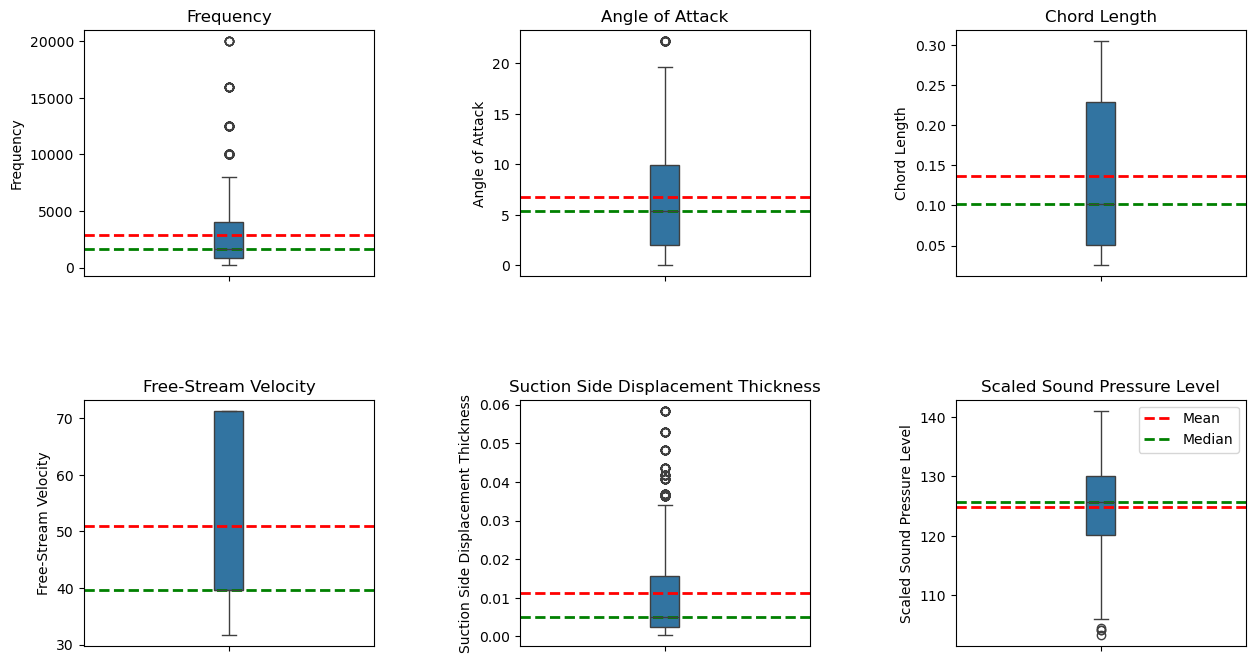

In [31]:
plt.figure(figsize=(15, 8))

boxplot_width = 0.1
padding = 0.5

def add_mean_line(data, width):
    sns.boxplot(y=data, width=width)
    plt.axhline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axhline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.subplot(2, 3, 1)
add_mean_line(pdframe['Frequency'], boxplot_width)
plt.title('Frequency')

plt.subplot(2, 3, 2)
add_mean_line(pdframe['Angle of Attack'],  boxplot_width)
plt.title('Angle of Attack')

plt.subplot(2, 3, 3)
add_mean_line(pdframe['Chord Length'], boxplot_width)
plt.title('Chord Length')

plt.subplot(2, 3, 4)
add_mean_line(pdframe['Free-Stream Velocity'], boxplot_width)
plt.title('Free-Stream Velocity')

plt.subplot(2, 3, 5)
add_mean_line(pdframe['Suction Side Displacement Thickness'],  boxplot_width)
plt.title('Suction Side Displacement Thickness')

plt.subplot(2, 3, 6)
add_mean_line(pdframe['Scaled Sound Pressure Level'], boxplot_width)
plt.title('Scaled Sound Pressure Level')

plt.legend(loc='best')
           


plt.subplots_adjust(wspace=padding, hspace=padding)

plt.show()

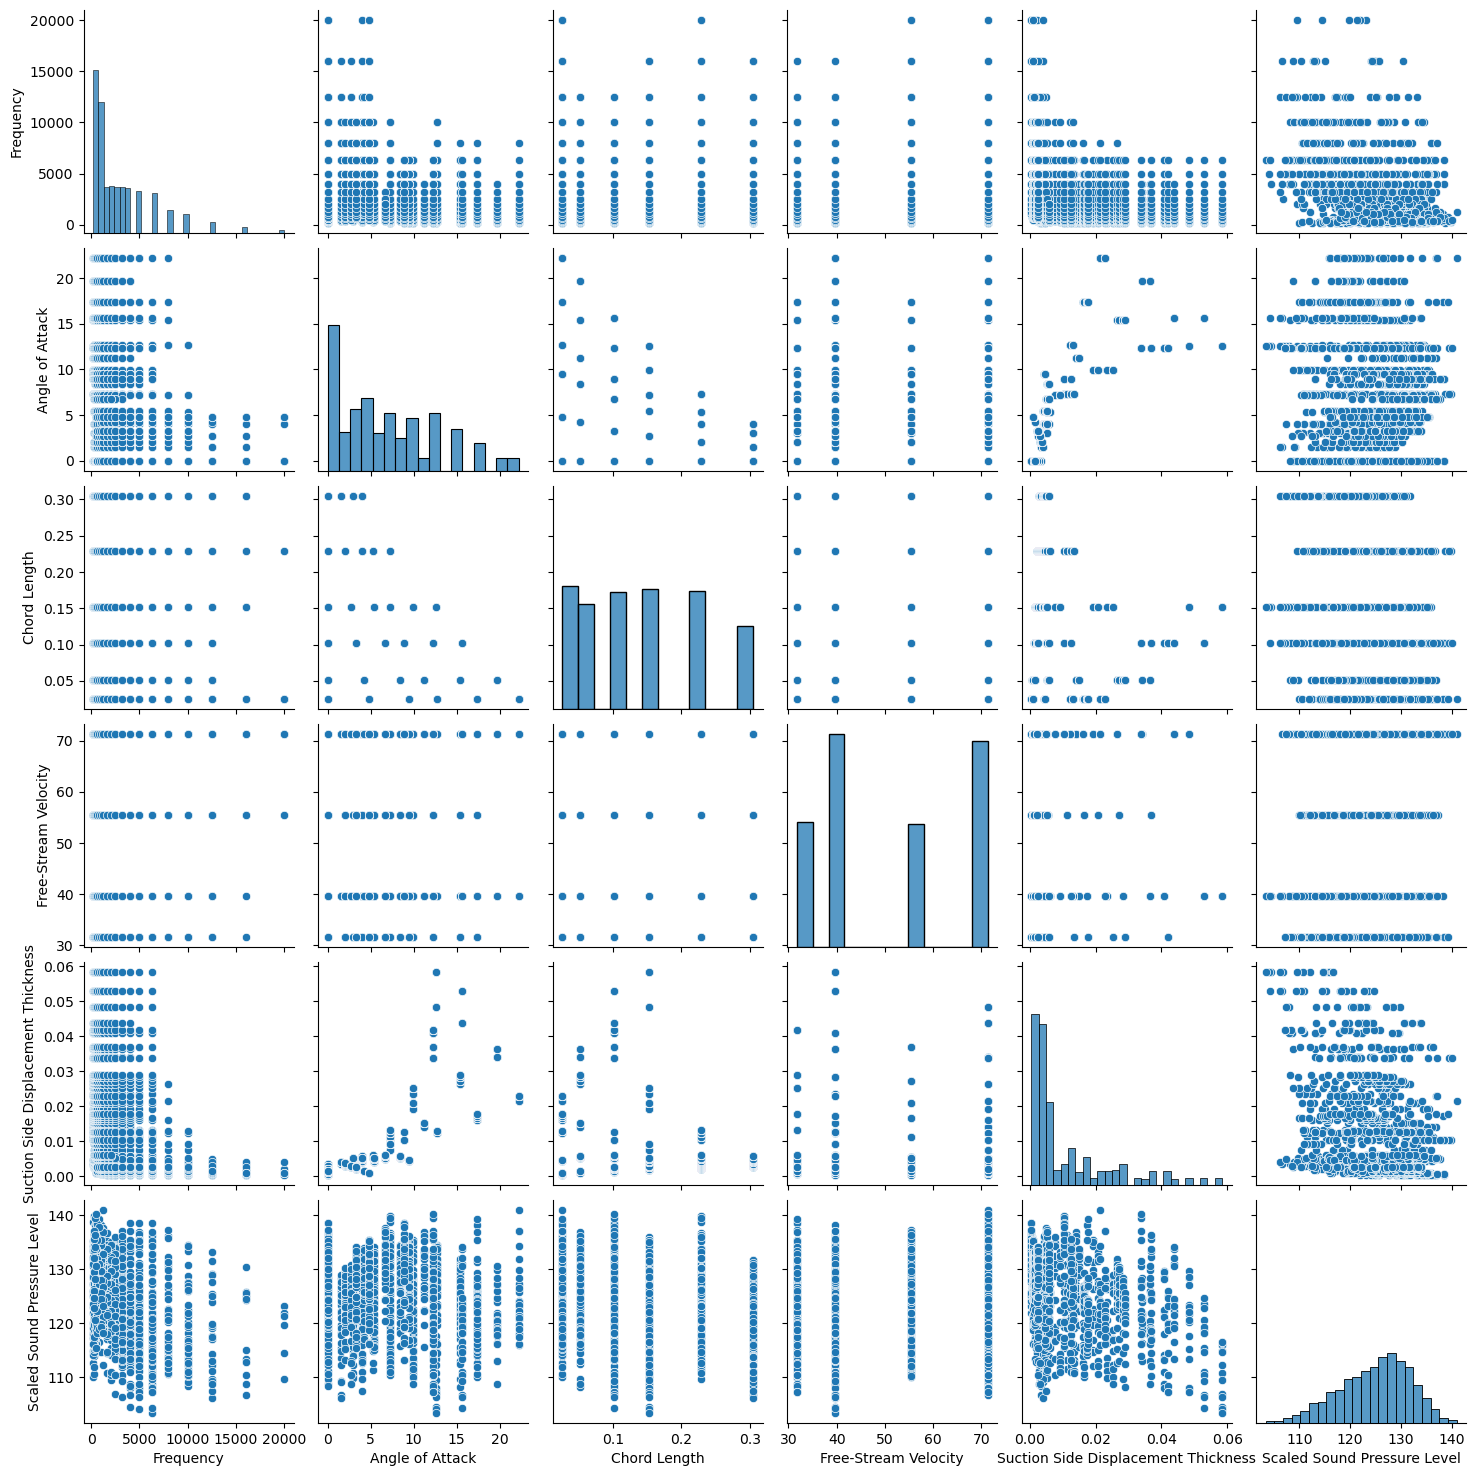

In [32]:
sns.pairplot(pdframe)